[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tselane2110/Applied-Computer-Vision/blob/main/assignment-1/Assignment-1.ipynb)

# Importing the Libraries

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. Adding noise to the Dog image:

In [15]:
def show_image(img, title="Image"):
    """
    Displays the input image
    """
    plt.figure(figsize=(5, 5)) 
    plt.imshow(img) 
    plt.title(title) 
    plt.axis("off")
    plt.show()


In [55]:
# function to add gaussian noise in an image

def add_gaussian_noise(img, mean, std):     
        
    # show image
    show_image(img, "Image before adding the gaussian noise")
    print("\n")
    
    # getting the shape of the image
    img_shape = img.shape
    
    # generating gaussian noise
    gaussian_noise = np.random.normal(mean, std, img_shape)
    
    # adding gaussian noise to the image
    noisy_img = img.astype(np.float64) + gaussian_noise
    
    # Clip values to the valid range [0, 255] before converting to uint8.
    # This prevents overflow (values >255) or underflow (values <0),
    # which would otherwise wrap around and give incorrect pixel intensities.
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    
    # Convert back to uint8 after adding noise
    # because standard images are stored as 8-bit unsigned integers (0–255).
    # Without this, the image might stay in float format, which most image viewers
    # and libraries do not expect. Using uint8 also ensures consistent display.
    noisy_img = noisy_img.astype(np.uint8)
    
    # printing the noisy image
    show_image(noisy_img, "Image after adding the gaussian noise")

    return noisy_img

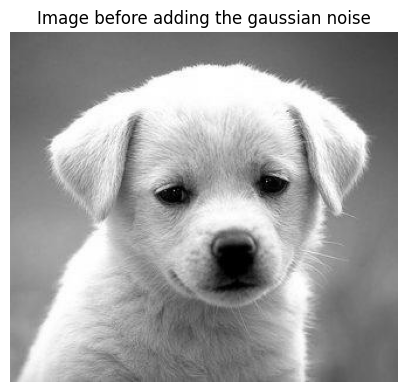

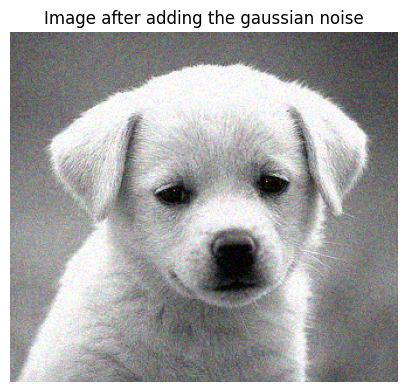

In [56]:
# testing the code above

path = "dog.jpg" # path to the image
img = cv.imread(path)
noisy_img = add_gaussian_noise(img, 0, 15)

## 2. Applying Convolution Operation Using Numpy

In [68]:
import numpy as np

def convolve_image(img, kernel):
    """
    Perform convolution on a 3D image (H, W, C) using a 3x3 kernel.
    
    Parameters:
        img    : numpy array, shape (H, W, C)
        kernel : numpy array, shape (3, 3)
    
    Returns:
        result : numpy array, same shape as input
    """
    h, w, c = img.shape
    result = np.zeros_like(img, dtype=np.float32)

    # number of pixels for zero padding
    n = len(kernel) # we assuming that the kernel is a square matrix

    # flipping kernel over x and y axis, for convolution
    kernel_flipped = np.flipud(np.fliplr(kernel)) #lr -> horizontal axis, up -> vertical axis
    
    # Pad each channel separately with zero-padding upto three pixels
    padded_img = np.pad(img, ((1,n),(1,n),(0 ,0)), mode='constant', constant_values=0)
    
    for ch in range(c):          # loop over channels
        for i in range(h):       # loop over rows
            for j in range(w):   # loop over cols
                region = padded_img[i:i+n, j:j+n, ch]
                result[i, j, ch] = np.sum(region * kernel_flipped)
    
    return np.clip(result, 0, 255).astype(np.uint8)

In [69]:
kernel = np.array( [[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]])

# applying convolution on the input image
result = convolve_image(img, kernel)

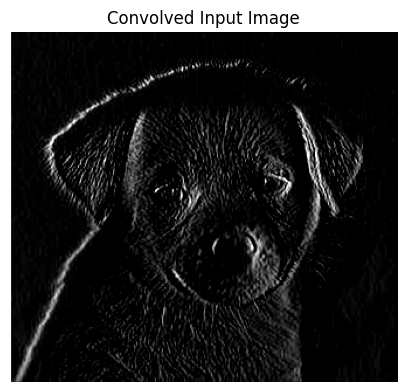

In [70]:
show_image(result, "Convolved Input Image")

## 3. Remove Noise and Sharpen The Input Image

In [71]:
def get_gaussian_kernel(size=7, sigma=1.0):
    """
    Generate a 2D Gaussian kernel.
    
    Parameters:
        size  : int, kernel size (must be odd, e.g., 3, 5, 7)
        sigma : float, standard deviation of Gaussian
    
    Returns:
        kernel : (size, size) numpy array
    """
    # Ensure odd size
    assert size % 2 == 1, "Kernel size must be odd"
    
    # Define range for x and y (center at 0)
    ax = np.arange(-(size // 2), size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    
    # Compute Gaussian function
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
    
    # Normalize so sum = 1
    kernel = kernel / np.sum(kernel)
    return kernel

# Example: 7x7 Gaussian kernel with sigma=1
# gk = gaussian_kernel(7, sigma=1.0)
# print(gk)
# print("Sum:", gk.sum())  # should be 1

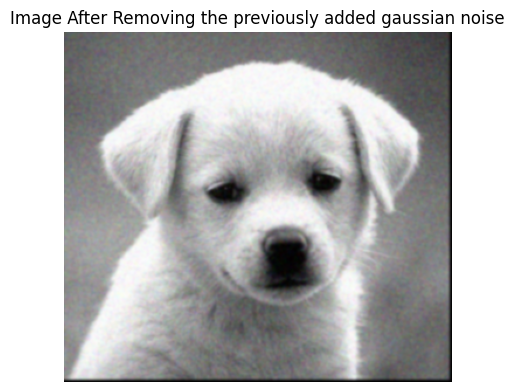

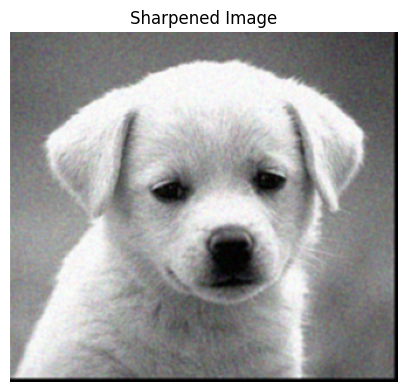

In [79]:
# sharpening kernel
sharpening_kernel = np.array([[1, 4, 6, 4, 1],
                              [4, 16, 24, 16, 4],
                              [6, 24, -476, 24, 6],
                              [4, 16, 24, 16, 4],
                              [1, 4, 6, 4, 1], ]) * (-1.0/256.0)

# getting gaussian kernel
gaussian_kernel = get_gaussian_kernel(7, 1.0)

# removing noise from the noisy image
convolved_image = convolve_image(noisy_img, gaussian_kernel)

# displaying the resultant image
show_image(convolved_image, "Image After Removing the previously added gaussian noise")

# sharpening the convolved image
sharpened_img = convolve_image(convolved_image, sharpening_kernel)

# displaying the resultant image
show_image(sharpened_img, "Sharpened Image")